<a href="https://colab.research.google.com/github/akanksha-patil1404/TransferLearning/blob/main/TransferLearningipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

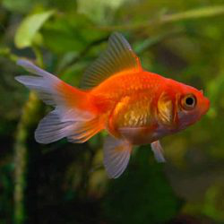

In [ ]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...]

array([[[[0.29019608, 0.3372549 , 0.05490196],
         [0.30588235, 0.35686275, 0.07058824],
         [0.3254902 , 0.39215686, 0.09803922],
         ...,
         [0.32941176, 0.38823529, 0.02352941],
         [0.31764706, 0.37647059, 0.01176471],
         [0.31372549, 0.37254902, 0.01568627]],

        [[0.29411765, 0.3372549 , 0.06666667],
         [0.31372549, 0.35686275, 0.09019608],
         [0.3372549 , 0.40392157, 0.1254902 ],
         ...,
         [0.33333333, 0.39215686, 0.02352941],
         [0.30980392, 0.36862745, 0.00784314],
         [0.30588235, 0.36470588, 0.00392157]],

        [[0.28235294, 0.3254902 , 0.07058824],
         [0.30980392, 0.35294118, 0.09803922],
         [0.34509804, 0.4       , 0.14117647],
         ...,
         [0.31764706, 0.37647059, 0.00784314],
         [0.29803922, 0.35686275, 0.        ],
         [0.29411765, 0.35294118, 0.        ]],

        ...,

        [[0.05882353, 0.12156863, 0.01568627],
         [0.05490196, 0.11372549, 0.01568627]

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


In [ ]:
data_dir


'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/sunflowers/21728822928_9f6817325a_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2588453601_66f2a03cca_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3840761441_7c648abf4d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5952223760_85972671d6_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20621698991_dcb323911d.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[PosixPath('datasets/flower_photos/roses/4413509121_a62879598a.jpg'),
 PosixPath('datasets/flower_photos/roses/15738649506_2b4c2fd933_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8667746487_781af9e615_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9369421752_db1ab2a6a4_m.jpg')]

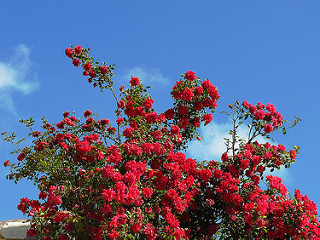

In [ ]:
PIL.Image.open(str(roses[3]))

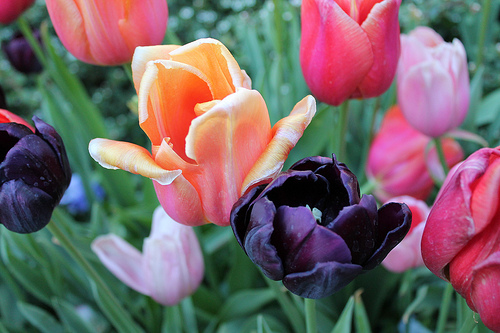

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:

flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4413509121_a62879598a.jpg'),
 PosixPath('datasets/flower_photos/roses/15738649506_2b4c2fd933_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8667746487_781af9e615_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16152175716_55d6968e08_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9369421752_db1ab2a6a4_m.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4413509121_a62879598a.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape


(333, 500, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X[0].shape


(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

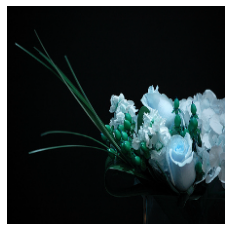

In [ ]:
plt.axis('off')
plt.imshow(X[0])

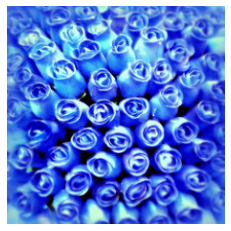

In [ ]:
plt.axis('off')
plt.imshow(X[1])

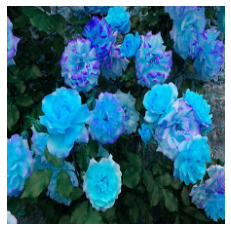

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 550, 795])

In [ ]:
image_labels[795]

'shower curtain'

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)


Epoch 1/5
86/86 [==============================] - 75s 814ms/step - loss: 0.7863 - acc: 0.7082
Epoch 2/5
86/86 [==============================] - 69s 799ms/step - loss: 0.4161 - acc: 0.8532
Epoch 3/5
86/86 [==============================] - 69s 806ms/step - loss: 0.3238 - acc: 0.8939
Epoch 4/5
86/86 [==============================] - 69s 799ms/step - loss: 0.2769 - acc: 0.9106
Epoch 5/5
86/86 [==============================] - 70s 810ms/step - loss: 0.2328 - acc: 0.9281


In [ ]:
model.evaluate(X_test_scaled,y_test)